<a href="https://colab.research.google.com/github/siddhantkd/Handwritten_Digit_Classification/blob/main/Classification_Digits_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [10]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()
#Importing hand written dataset from keras (mnist)

In [4]:
print(len(x_train),len(x_test))

60000 10000


In [6]:
x_train[0].shape

(28, 28)

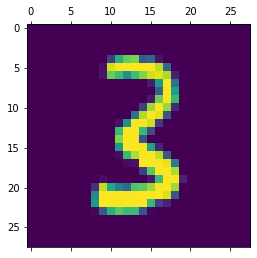

In [8]:
plt.matshow(x_train[50000])


In [12]:
y_train[50000]

3

In [13]:
x_train.shape

(60000, 28, 28)

In [26]:
x_train = x_train / 255
x_test = x_test / 255

In [27]:
x_train_flat = x_train.reshape(len(x_train),28*28)
x_test_flat = x_test.reshape(len(x_test),28*28)

In [28]:
print(x_train_flat.shape, x_test_flat.shape)

(60000, 784) (10000, 784)


In [29]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4656 - accuracy: 0.8777
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3035 - accuracy: 0.9154
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2836 - accuracy: 0.9212
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2728 - accuracy: 0.9239
Epoch 5/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2661 - accuracy: 0.9251


In [32]:
model.evaluate(x_test_flat, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.2672 - accuracy: 0.9254


[0.26717284321784973, 0.9254000186920166]

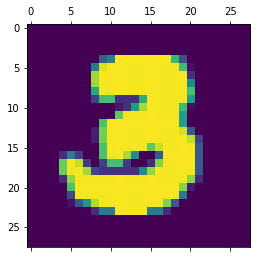

In [33]:
plt.matshow(x_test[200])

In [36]:
y_pred = model.predict(x_test_flat)

In [37]:
y_pred[200]

array([1.0766685e-03, 5.6472543e-10, 6.5049475e-01, 9.9953741e-01,
       1.6449171e-08, 3.6693573e-01, 1.0593532e-05, 2.8939249e-09,
       4.4461548e-02, 3.7106588e-06], dtype=float32)

In [38]:
np.argmax(y_pred[200]) #Numpy Function to get the index of maximum value in the matrix

3

In [39]:
y_pred_labels = [np.argmax(i) for i in y_pred] #Labels which are the categories 
y_pred_labels[:5]

[7, 2, 1, 0, 4]

In [41]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels) #Confusion Matrix 
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 956,    0,    2,    1,    0,    6,    9,    3,    2,    1],
       [   0, 1107,    3,    2,    0,    1,    4,    2,   16,    0],
       [   4,    8,  910,   21,   12,    5,   13,   11,   44,    4],
       [   1,    0,   11,  929,    0,   20,    3,   13,   24,    9],
       [   1,    1,    2,    1,  908,    0,   12,    4,   10,   43],
       [   7,    2,    1,   35,   10,  770,   17,    9,   33,    8],
       [   7,    3,    5,    1,    7,   10,  920,    2,    3,    0],
       [   1,    5,   22,    5,    5,    0,    0,  957,    2,   31],
       [   4,    8,    5,   19,    9,   24,   10,   14,  874,    7],
       [  10,    7,    1,    7,   20,    6,    0,   28,    7,  923]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

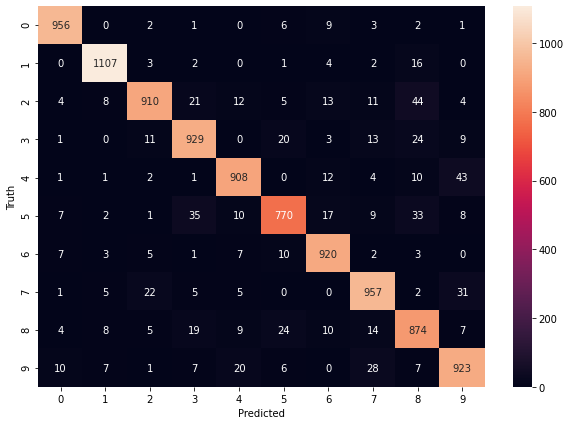

In [42]:
#Visualising Confusion Matrix using seaborn
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [44]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train_flat, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2681 - accuracy: 0.9242
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1201 - accuracy: 0.9650
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0845 - accuracy: 0.9744
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0636 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0513 - accuracy: 0.9845


In [45]:
model.evaluate(x_test_flat, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0794 - accuracy: 0.9751


[0.07935246080160141, 0.9750999808311462]

Text(69.0, 0.5, 'Truth')

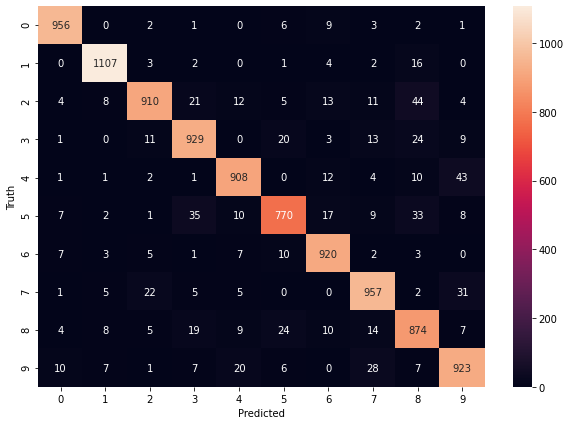

In [46]:
y_pred = model.predict(x_test_flat)
y_pred_labels = [np.argmax(i) for i in y_pred] #Labels which are the categories 
#Visualising Confusion Matrix using seaborn
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [49]:
np.argmax(y_pred[3500])

4